In [2]:
# Importing all libraries

import matplotlib.pyplot as plt
import numpy as np 
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import mpl_toolkits.mplot3d.art3d as art3d
from Functions import *

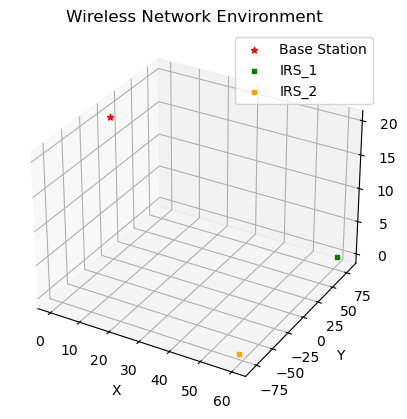

In [3]:
#============== System parameters
'''
Nt = Number of transmit antennas (SISO = 1)
K = Number of Users
BW = Bandwidth
NF = Noise Floor
ALPHA = PLE for direct link
BETA = PLE for indirect link
wn = efficiency of transmit power amplifier

'''
Nt = 1
# K = 2
# gamma = db2pow(20)
f = 2.4e9
c = 3e8
Lambda = c/f
halfLambda = 0.5*Lambda
quarterLambda = 0.25*Lambda
BW = 20e6
NF = 10
noise = -174+10*np.log10(BW) + NF

beta_min = 0.2
k = 1.6
phi = 0.43 * np.pi

GRID_RADIUS = 1000
BASE_STATION_POSITION = (0, 0, 20)
TRANSMIT_POWER_WATTS = 4 #in watts
FADING_STD_MEAN = 0
FADING_STD_DEV = np.sqrt(0.5)
# FADING_STD_DEV = 3

BETA1 = 2.8 #path loss exponent (indirect) bs -> irs
BETA2 = 2.2  #path loss exponent (indirect) irs -> user
ALPHA = 3.8 #path loss exponent (direct) bs -> user
# m = 2
# omega = np.sqrt(0.5)

IRS_POSITION_1 = (60, 80, 10)
IRS_POSITION_2 = (60, -80, 10)
nIRSrow = 20
nIRScol = nIRSrow
Ns = nIRSrow * nIRScol

# refdis = np.sqrt(20)

# Power consumption params
wn = 0.5
# Pt = 10 * np.log10(TRANSMIT_POWER_WATTS) + 30 # in dBm
Pb = 10 # in dBw
Pu = 10 # in dBm
# Pt = 10 * np.log10(TRANSMIT_POWER_WATTS) + 30 # in dBm
# Pb = 10 # in dBw
# Pu = 10 # in dBm

# # Generate user positions
# USER_POSITION = (50,5,0)
# user_positions = generate_user_positions_3D(K, GRID_RADIUS)
# loc_U = user_positions
# print('User positions:'"\n")
# print(loc_U)

# Generate antennas position
AP_position = generate_station_positions_3D(BASE_STATION_POSITION)
xt, yt, zt = AP_position[0]
tx_ant_coords = generate_transmit_antenna_coordinates_3D(Nt, xt, yt, zt, halfLambda, quarterLambda)
loc_T = tx_ant_coords

# print('Transmit antenna(e) coordinates:'"\n", loc_T) 
# print()


# Generate IRS position_1
irs_position_1 = generate_IRS_3D(IRS_POSITION_1)
xs_1, ys_1, zs_1 = irs_position_1[0]

irs_coords_1 = generate_irs_coordinates_3D(xs_1, ys_1, zs_1, nIRSrow, nIRScol, halfLambda, quarterLambda)
loc_S_1 = irs_coords_1

# # print('IRS 1 elements coordinates:'"\n", loc_S_1) 
# # print()

# Generate IRS position_2
irs_position_2 = generate_IRS_3D(IRS_POSITION_2)
xs_2, ys_2, zs_2 = irs_position_2[0]

irs_coords_2 = generate_irs_coordinates_3D(xs_2, ys_2, zs_2, nIRSrow, nIRScol, halfLambda, quarterLambda)
loc_S_2 = irs_coords_2

# # print('IRS 2 elements coordinates:'"\n", loc_S_2) 
# # print()

# dTU, dSU_1, dTS_1 = calculate_distances_3D(loc_U, loc_T, loc_S_1)
# dTU, dSU_2, dTS_2 = calculate_distances_3D(loc_U, loc_T, loc_S_2)

# # Reshapiing the distance from antennas/BS to user
# dTU = dTU.reshape(Nt,K)
# # Compute row-wise averages
# dSU_1 = np.mean(dSU_1, axis=1, keepdims=True)
# dSU_1 = dSU_1.reshape(1,K)
# # Compute the sum of elements in each row
# dTS_1 = np.mean(dTS_1, axis=1)
# # Compute the average of row sums
# dTS_1 = np.mean(dTS_1)
# # Compute row-wise averages
# dSU_2 = np.mean(dSU_2, axis=1, keepdims=True)
# dSU_2 = dSU_2.reshape(1,K)
# # Compute the sum of elements in each row
# dTS_2 = np.mean(dTS_2, axis=1)
# # Compute the average of row sums
# dTS_2 = np.mean(dTS_2)

# Plot the 3D grid, base station, IRS, and user positions
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xt, yt, zt, color='red', marker='*', label='Base Station')
plt.scatter(IRS_POSITION_1[0], IRS_POSITION_1[1], IRS_POSITION_1[2], color='green', marker='s', label='IRS_1')
plt.scatter(IRS_POSITION_2[0], IRS_POSITION_2[1], IRS_POSITION_2[2],color='orange', marker='s', label='IRS_2')
#ax.scatter(user_positions[:, 0], user_positions[:, 1], color='blue', marker='o', label='User')
ax.xlim = (-GRID_RADIUS, GRID_RADIUS)
ax.ylim = (-GRID_RADIUS, GRID_RADIUS)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Wireless Network Environment')
ax.legend()
ax.grid(True)

# Draw the circle in the x-y plane
# circle = plt.Circle((xt, yt), (GRID_RADIUS), edgecolor='black', facecolor='none')
# ax.add_patch(circle)
# art3d.pathpatch_2d_to_3d(circle, z=0, zdir='z')  # Add the circle to the x-y plane at z=zt
plt.show()

In [4]:
print(pow2dBm(TRANSMIT_POWER_WATTS))

36.020599913279625


# Channel Generation

In [5]:
Numofusers = [5, 10, 20, 25, 50, 100, 200, 400]
#Numofusers = np.array(Numofusers)

Kmax = np.max(Numofusers)
print(Kmax)

NUM_SIMULATIONS = 50


h_dk_3d = np.zeros((NUM_SIMULATIONS,1,Kmax), dtype= np.complex128)
h_rk1_3d = np.zeros((NUM_SIMULATIONS,Ns,Kmax), dtype= np.complex128)
h_rk1_h_3d = np.zeros((NUM_SIMULATIONS,Kmax,Ns), dtype= np.complex128)
G1_3d = np.zeros((NUM_SIMULATIONS,Ns,1), dtype= np.complex128)
h_rk2_3d = np.zeros((NUM_SIMULATIONS,Ns,Kmax), dtype= np.complex128)
h_rk2_h_3d = np.zeros((NUM_SIMULATIONS,Kmax,Ns), dtype= np.complex128) 
G2_3d = np.zeros((NUM_SIMULATIONS,Ns,1), dtype= np.complex128)



# Perform simulations
for i in range(NUM_SIMULATIONS):

    # Generate the Rayleigh Fading Channel for each user (h_dk)
    h_dk = np.zeros((Kmax,1))
    h_dk = np.array(generate_rayleigh_fading_channel(Kmax,FADING_STD_MEAN,FADING_STD_DEV))

    h_dk = np.reshape(h_dk ,(1,Kmax))

    h_dk_3d[i] = h_dk
    
    # Generate the Nakagami Channel from each user to the IRS-1 (h_rk1)
    fading = []
    for user in range(Kmax):
        fading.append(generate_rayleigh_fading_channel(Ns,FADING_STD_MEAN,FADING_STD_DEV)) 
    h_rk1 = fading
    h_rk1 = np.reshape(h_rk1,(Ns,Kmax))
    h_rk1_transpose = np.transpose(h_rk1)
    h_rk1_h = np.conj(h_rk1_transpose)
    h_rk1_3d[i] = h_rk1
    h_rk1_h_3d[i] = h_rk1_h


    # Generate the Nakagami Channel from each user to the IRS-2 (h_rk2)
    fading = []
    for user in range(Kmax):
        fading.append(generate_rayleigh_fading_channel(Ns,FADING_STD_MEAN,FADING_STD_DEV)) 
    h_rk2 = fading
    h_rk2 = np.reshape(h_rk2,(Ns,Kmax))
    h_rk2_transpose = np.transpose(h_rk2)
    h_rk2_h = np.conj(h_rk2_transpose)
    h_rk2_3d[i] = h_rk2
    h_rk2_h_3d[i] = h_rk2_h

    # Generate the Nakagami Channel from base_station to the IRS-1 (G1)
    G1 = generate_rayleigh_fading_channel(Ns,FADING_STD_MEAN,FADING_STD_DEV) 
    G1 = np.reshape(G1,(Ns,1))
    G1_3d[i] = G1

    # Generate the Nakagami Channel from base_station to the IRS-2 (G2)
    G2 = generate_rayleigh_fading_channel(Ns,FADING_STD_MEAN,FADING_STD_DEV)
    G2 = np.reshape(G2,(Ns,1))
    G2_3d[i] = G2

print('Size of hdk3d', np.shape(h_dk_3d))
print('Size of hrk3d', np.shape(h_rk1_3d))
print('Size of hrkh3d', np.shape(h_rk1_h_3d))
print('Size of g3d', np.shape(G1_3d))


400
Size of hdk3d (50, 1, 400)
Size of hrk3d (50, 400, 400)
Size of hrkh3d (50, 400, 400)
Size of g3d (50, 400, 1)


# Actual Code

In [6]:

# Numofusers = [2, 4, 8]
double_irs_efficieny_array = np.zeros((4,len(Numofusers)))
double_irs_sum_rate_array = np.zeros((4,len(Numofusers)))

single_irs_efficieny_array = np.zeros((4,len(Numofusers)))
single_irs_sum_rate_array = np.zeros((4,len(Numofusers)))

without_irs_efficieny_array = np.zeros((1,len(Numofusers)))
without_irs_sum_rate_array = np.zeros((1,len(Numofusers)))

for NOuser in Numofusers:

    # # Generate user positions
    user_positions = generate_user_positions_3D(NOuser, GRID_RADIUS)
    loc_U = user_positions
    # print('User positions:', loc_U)

    dTU, dSU_1, dTS_1 = calculate_distances_3D(loc_U, loc_T, loc_S_1)
    dTU, dSU_2, dTS_2 = calculate_distances_3D(loc_U, loc_T, loc_S_2)

    dTU = dTU.reshape(Nt,NOuser)

    # print('dTU:', dTU)   # Shape = (1,Numofusers)
    # print('dSU_1:', dSU_1) # Shape = (Numofusers, Numofelements)
    # print('dTS_1:', dTS_1) # Shape = (Numofelements, 1)

    # inside500 = []
    # outside500 = []

    # for userdis in dTU:
    #     if userdis < 500:
    #         inside500.append(userdis)
    #     else:
    #         outside500.append(userdis)

    # print('inside500:', len(inside500))
    # print('outside500:', len(outside500)) 

    without_irs_energy_efficiency = 0
    without_irs_sum_rate = 0

    denergy_efficiency = 0
    dsum_rate = 0

    senergy_efficiency = 0
    ssum_rate = 0

    denergy_efficiency_B1 = 0
    dsum_rate_B1 = 0

    senergy_efficiency_B1 = 0
    ssum_rate_B1 = 0

    denergy_efficiency_B2 = 0
    dsum_rate_B2 = 0

    senergy_efficiency_B2 = 0
    ssum_rate_B2 = 0

    denergy_efficiency_B3 = 0
    dsum_rate_B3 = 0

    senergy_efficiency_B3 = 0
    ssum_rate_B3 = 0

    # Generate the Rayleigh Fading Channel for each user (h_dk) #Direct link
    h_dk1_array = [h_dk_3d[s, :, :NOuser] for s in range(NUM_SIMULATIONS)]  # Shape: (NUM_SIMULATIONS, K, 1)

    # Generate the Nakagami Channel from IRS 1 to each user (h_rk)
    h_rk1_array = [h_rk1_3d[s, :, :NOuser] for s in range(NUM_SIMULATIONS)]

    h_rk_transpose1_array = [h_rk1_h_3d[s, :NOuser, :] for s in range(NUM_SIMULATIONS)]

    h_rk2_array = [h_rk2_3d[s, :, :NOuser] for s in range(NUM_SIMULATIONS)]

    h_rk_transpose2_array = [h_rk2_h_3d[s, :NOuser, :] for s in range(NUM_SIMULATIONS)]
    
    # Generate the Nakagami Channel from base_station to the IRS1 (G)
    g1_array = [G1_3d[s, :, :] for s in range(NUM_SIMULATIONS)]

    # Generate the Nakagami Channel from base_station to the IRS2 (G)
    g2_array =[G2_3d[s, :, :] for s in range(NUM_SIMULATIONS)]

    # Perform simulations
    for s in range(NUM_SIMULATIONS):

####################################### Channel Generation #########################################

        # Generate the Rayleigh Fading Channel for each user (h_dk) #Direct link
        h_dk1 = h_dk1_array[s] # Shape: (K, 1)
        # print('h_dk1:', h_dk1.shape)


        for m in range(NOuser):
            if(dTU[0][m] < 200):
                h_dk1[0][m] = 0
            else:
                h_dk1[0][m] = h_dk1[0][m]


        # Generate the Nakagami Channel from IRS 1 to each user (h_rk)
        h_rk1 = h_rk1_array[s]
        # print('h_rk1:', h_rk1.shape)

        h_rk_transpose1 = h_rk_transpose1_array[s]
        # print('h_rk_transpose1:', h_rk_transpose1.shape)

        h_rk2 = h_rk2_array[s]
        # print('h_rk2:', h_rk2.shape)

        h_rk_transpose2 = h_rk_transpose2_array[s]
        # print('h_rk_transpose2:', h_rk_transpose2.shape)
        
        # Generate the Nakagami Channel from base_station to the IRS1 (G)
        g1 = g1_array[s]
        # print('g1:', g1.shape)

        # Generate the Nakagami Channel from base_station to the IRS2 (G)
        g2 = g2_array[s]
        # print('g2:', g2.shape)

############################### Result Array Calculation #########################################

        results_array_1_Continous = results_array_sharing_ideal(NOuser, Ns, Nt, h_dk1*0, h_rk1, h_rk_transpose1, g1) # Continous Phase Shift
        # print('results_array_1:', results_array_1)
        results_array_2_Continous = results_array_sharing_ideal(NOuser, Ns, Nt, h_dk1*0, h_rk2 ,h_rk_transpose2, g2) # Continous Phase Shift
        # print('results_array_2:', results_array_2)

        results_array_1_B1 = results_array_sharing_practical(NOuser, Ns, Nt, h_dk1*0, h_rk1, h_rk_transpose1, g1, 1, beta_min, phi, k) # B=1 Discrete Phase Shift
        results_array_2_B1 = results_array_sharing_practical(NOuser, Ns, Nt, h_dk1*0, h_rk2, h_rk_transpose2, g2, 1, beta_min, phi, k) # B=1 Discrete Phase Shift

        results_array_1_B2 = results_array_sharing_practical(NOuser, Ns, Nt, h_dk1*0, h_rk1, h_rk_transpose1, g1, 2, beta_min, phi, k) # B=1 Discrete Phase Shift
        results_array_2_B2 = results_array_sharing_practical(NOuser, Ns, Nt, h_dk1*0, h_rk2, h_rk_transpose2, g2, 2, beta_min, phi, k) # B=1 Discrete Phase Shift

        results_array_1_B3 = results_array_sharing_practical(NOuser, Ns, Nt, h_dk1*0, h_rk1, h_rk_transpose1, g1, 3, beta_min, phi, k) # B=1 Discrete Phase Shift
        results_array_2_B3 = results_array_sharing_practical(NOuser, Ns, Nt, h_dk1*0, h_rk2, h_rk_transpose2, g2, 3, beta_min, phi, k) # B=1 Discrete Phase Shift

        without_irs_link_inter = []

        double_irs_link_inter = []
        single_irs_link_inter = []

        double_irs_link_inter_B1 = []
        single_irs_link_inter_B1 = []

        double_irs_link_inter_B2 = []
        single_irs_link_inter_B2 = []

        double_irs_link_inter_B3 = []
        single_irs_link_inter_B3 = []
            
        for i in range(NOuser):

            ############################################### Without IRS ###############################################
            link_inter = (TRANSMIT_POWER_WATTS)**0.5 * ((h_dk1[0][i]) / np.sqrt((dTU[0][i])**ALPHA))
            # print('link_inter:', link_inter)
            without_irs_link_inter.append(link_inter)  # Append the computed value to the list 

            ########################################## Continous Phase Shift ###########################################
            dlink_inter_value = (TRANSMIT_POWER_WATTS)**0.5 * (((h_dk1[0][i]*0)/(np.sqrt((dTU[0][i])**ALPHA))) + ((results_array_1_Continous[0][i])/(np.sqrt((dSU_1[i][0])**BETA2 * (dTS_1[0][0])**BETA1))) + ((results_array_2_Continous[0][i])/(np.sqrt((dSU_2[i][0])**BETA2 * (dTS_2[0][0])**BETA1))))
            # print('dlink_inter_value:', dlink_inter_value)
            double_irs_link_inter.append(dlink_inter_value)  # Append the computed value to the list

            slink_inter_value = (TRANSMIT_POWER_WATTS)**0.5 * (((h_dk1[0][i]*0)/(np.sqrt((dTU[0][i])**ALPHA))) + ((results_array_1_Continous[0][i])/(np.sqrt((dSU_1[i][0])**BETA2 * (dTS_1[0][0])**BETA1))))
            # print('slink_inter_value:', slink_inter_value)
            single_irs_link_inter.append(slink_inter_value)  # Append the computed value to the list

            ########################################## Discrete Phase Shift ###########################################
            dlink_inter_value_B1 = (TRANSMIT_POWER_WATTS)**0.5 * (((h_dk1[0][i]*0)/(np.sqrt((dTU[0][i])**ALPHA))) + ((results_array_1_B1[0][i])/(np.sqrt((dSU_1[i][0])**BETA2 * (dTS_1[0][0])**BETA1))) + ((results_array_2_B1[0][i])/(np.sqrt((dSU_2[i][0])**BETA2 * (dTS_2[0][0])**BETA1))))
            # print('dlink_inter_value_B1:', dlink_inter_value_B1)
            double_irs_link_inter_B1.append(dlink_inter_value_B1)  # Append the computed value to the list

            slink_inter_value_B1 = (TRANSMIT_POWER_WATTS)**0.5 * (((h_dk1[0][i]*0)/(np.sqrt((dTU[0][i])**ALPHA))) + ((results_array_1_B1[0][i])/(np.sqrt((dSU_1[i][0])**BETA2 * (dTS_1[0][0])**BETA1))))
            # print('slink_inter_value_B1:', slink_inter_value_B1)
            single_irs_link_inter_B1.append(slink_inter_value_B1)  # Append the computed value to the list

            dlink_inter_value_B2 = (TRANSMIT_POWER_WATTS)**0.5 * (((h_dk1[0][i]*0)/(np.sqrt((dTU[0][i])**ALPHA))) + ((results_array_1_B2[0][i])/(np.sqrt((dSU_1[i][0])**BETA2 * (dTS_1[0][0])**BETA1))) + ((results_array_2_B2[0][i])/(np.sqrt((dSU_2[i][0])**BETA2 * (dTS_2[0][0])**BETA1))))
            # print('dlink_inter_value_B2:', dlink_inter_value_B2)
            double_irs_link_inter_B2.append(dlink_inter_value_B2)  # Append the computed value to the list

            slink_inter_value_B2 = (TRANSMIT_POWER_WATTS)**0.5 * (((h_dk1[0][i]*0)/(np.sqrt((dTU[0][i])**ALPHA))) + ((results_array_1_B2[0][i])/(np.sqrt((dSU_1[i][0])**BETA2 * (dTS_1[0][0])**BETA1))))
            # print('slink_inter_value_B2:', slink_inter_value_B2)
            single_irs_link_inter_B2.append(slink_inter_value_B2)  # Append the computed value to the list

            dlink_inter_value_B3 = (TRANSMIT_POWER_WATTS)**0.5 * (((h_dk1[0][i]*0)/(np.sqrt((dTU[0][i])**ALPHA))) + ((results_array_1_B3[0][i])/(np.sqrt((dSU_1[i][0])**BETA2 * (dTS_1[0][0])**BETA1))) + ((results_array_2_B3[0][i])/(np.sqrt((dSU_2[i][0])**BETA2 * (dTS_2[0][0])**BETA1))))
            # print('dlink_inter_value_B3:', dlink_inter_value_B3)
            double_irs_link_inter_B3.append(dlink_inter_value_B3)  # Append the computed value to the list

            slink_inter_value_B3 = (TRANSMIT_POWER_WATTS)**0.5 * (((h_dk1[0][i]*0)/(np.sqrt((dTU[0][i])**ALPHA))) + ((results_array_1_B3[0][i])/(np.sqrt((dSU_1[i][0])**BETA2 * (dTS_1[0][0])**BETA1))))
            # print('slink_inter_value_B3:', slink_inter_value_B3)
            single_irs_link_inter_B3.append(slink_inter_value_B3)  # Append the computed value to the list

        # Convert the list to a numpy array
        without_irs_link_inter = np.array(np.abs(without_irs_link_inter))
        without_irs_link_inter_array = without_irs_link_inter.reshape(1,NOuser)

        double_irs_link_inter = np.array(np.abs(double_irs_link_inter))
        double_irs_link_inter_array = double_irs_link_inter.reshape(1,NOuser)

        single_irs_link_inter = np.array(np.abs(single_irs_link_inter))
        single_irs_link_inter_array = single_irs_link_inter.reshape(1,NOuser)

        double_irs_link_inter_B1 = np.array(np.abs(double_irs_link_inter_B1))
        double_irs_link_inter_array_B1 = double_irs_link_inter_B1.reshape(1,NOuser)

        single_irs_link_inter_B1 = np.array(np.abs(single_irs_link_inter_B1))
        single_irs_link_inter_array_B1 = single_irs_link_inter_B1.reshape(1,NOuser)

        double_irs_link_inter_B2 = np.array(np.abs(double_irs_link_inter_B2))
        double_irs_link_inter_array_B2 = double_irs_link_inter_B2.reshape(1,NOuser)

        single_irs_link_inter_B2 = np.array(np.abs(single_irs_link_inter_B2))
        single_irs_link_inter_array_B2 = single_irs_link_inter_B2.reshape(1,NOuser)

        double_irs_link_inter_B3 = np.array(np.abs(double_irs_link_inter_B3))
        double_irs_link_inter_array_B3 = double_irs_link_inter_B3.reshape(1,NOuser)

        single_irs_link_inter_B3 = np.array(np.abs(single_irs_link_inter_B3))
        # print('single_irs_link_inter_B3:', single_irs_link_inter_B3)
        single_irs_link_inter_array_B3 = single_irs_link_inter_B3.reshape(1,NOuser)

            
        # Calculate link_budget using the updated link_inter array (dBm Convertion)
        without_irs_budget = 10 * np.log10((without_irs_link_inter_array)**2) + 30

        dlink_budget = 10 * np.log10((double_irs_link_inter_array)**2) + 30 
        dlink_budget = dlink_budget.reshape(1,NOuser)

        slink_budget = 10 * np.log10((single_irs_link_inter_array)**2) + 30
        slink_budget = slink_budget.reshape(1,NOuser)

        dlink_budget_B1 = 10 * np.log10((double_irs_link_inter_array_B1)**2) + 30
        dlink_budget_B1 = dlink_budget_B1.reshape(1,NOuser)

        slink_budget_B1 = 10 * np.log10((single_irs_link_inter_array_B1)**2) + 30
        slink_budget_B1 = slink_budget_B1.reshape(1,NOuser)

        dlink_budget_B2 = 10 * np.log10((double_irs_link_inter_array_B2)**2) + 30
        dlink_budget_B2 = dlink_budget_B2.reshape(1,NOuser)

        slink_budget_B2 = 10 * np.log10((single_irs_link_inter_array_B2)**2) + 30
        slink_budget_B2 = slink_budget_B2.reshape(1,NOuser)

        dlink_budget_B3 = 10 * np.log10((double_irs_link_inter_array_B3)**2) + 30
        dlink_budget_B3 = dlink_budget_B3.reshape(1,NOuser)

        slink_budget_B3 = 10 * np.log10((single_irs_link_inter_array_B3)**2) + 30
        slink_budget_B3 = slink_budget_B3.reshape(1,NOuser)

        # SNR Calculation
        without_irs_SNR_matrix = []
        dSNR_matrix = []
        sSNR_matrix = []
        dSNR_matrix_B1 = []
        sSNR_matrix_B1 = []
        dSNR_matrix_B2 = []
        sSNR_matrix_B2 = []
        dSNR_matrix_B3 = []
        sSNR_matrix_B3 = []
            
        # Calculate SNR
        for snr in range(NOuser):
            without_irs_SNR = compute_SNR(without_irs_budget[0][snr], noise)
            without_irs_SNR_matrix.append(without_irs_SNR)

            dSNR = compute_SNR(dlink_budget[0][snr], noise)
            dSNR_matrix.append(dSNR)

            sSNR = compute_SNR(slink_budget[0][snr], noise)
            sSNR_matrix.append(sSNR)

            dSNR_B1 = compute_SNR(dlink_budget_B1[0][snr], noise)
            dSNR_matrix_B1.append(dSNR_B1)

            sSNR_B1 = compute_SNR(slink_budget_B1[0][snr], noise)
            sSNR_matrix_B1.append(sSNR_B1)

            dSNR_B2 = compute_SNR(dlink_budget_B2[0][snr], noise)
            dSNR_matrix_B2.append(dSNR_B2)

            sSNR_B2 = compute_SNR(slink_budget_B2[0][snr], noise)
            sSNR_matrix_B2.append(sSNR_B2)

            dSNR_B3 = compute_SNR(dlink_budget_B3[0][snr], noise)
            dSNR_matrix_B3.append(dSNR_B3)

            sSNR_B3 = compute_SNR(slink_budget_B3[0][snr], noise)
            sSNR_matrix_B3.append(sSNR_B3)
        
        # Convert the list to a numpy array
        without_irs_SNR_matrix = np.array(without_irs_SNR_matrix)
        without_irs_SNR_matrix = without_irs_SNR_matrix.reshape(1,NOuser)

        dSNR_matrix = np.array(dSNR_matrix)
        dSNR_matrix = dSNR_matrix.reshape(1,NOuser)

        sSNR_matrix = np.array(sSNR_matrix)
        sSNR_matrix = sSNR_matrix.reshape(1,NOuser)

        dSNR_matrix_B1 = np.array(dSNR_matrix_B1)
        dSNR_matrix_B1 = dSNR_matrix_B1.reshape(1,NOuser)

        sSNR_matrix_B1 = np.array(sSNR_matrix_B1)
        sSNR_matrix_B1 = sSNR_matrix_B1.reshape(1,NOuser)

        dSNR_matrix_B2 = np.array(dSNR_matrix_B2)
        dSNR_matrix_B2 = dSNR_matrix_B2.reshape(1,NOuser)

        sSNR_matrix_B2 = np.array(sSNR_matrix_B2)
        sSNR_matrix_B2 = sSNR_matrix_B2.reshape(1,NOuser)

        dSNR_matrix_B3 = np.array(dSNR_matrix_B3)
        dSNR_matrix_B3 = dSNR_matrix_B3.reshape(1,NOuser)

        sSNR_matrix_B3 = np.array(sSNR_matrix_B3)
        sSNR_matrix_B3 = sSNR_matrix_B3.reshape(1,NOuser)

        # Calculate rate 
        without_irs_rate_matrix = BW * compute_rate((without_irs_SNR_matrix))
        without_irs_rate_matrix_new = without_irs_rate_matrix.flatten()
        without_irs_sum_rate_N = np.sum(without_irs_rate_matrix_new)
        without_irs_sum_rate = without_irs_sum_rate + (without_irs_sum_rate_N/1e6)

        drate_matrix = BW * compute_rate((dSNR_matrix))
        drate_matrix_new = drate_matrix.flatten()
        dsum_rate_N = np.sum(drate_matrix_new)
        dsum_rate = dsum_rate + (dsum_rate_N/1e6)

        srate_matrix = BW * compute_rate((sSNR_matrix))
        srate_matrix_new = srate_matrix.flatten()
        ssum_rate_N = np.sum(srate_matrix_new)
        ssum_rate = ssum_rate + (ssum_rate_N/1e6)

        drate_matrix_B1 = BW * compute_rate((dSNR_matrix_B1))
        drate_matrix_new_B1 = drate_matrix_B1.flatten()
        dsum_rate_N_B1 = np.sum(drate_matrix_new_B1)
        dsum_rate_B1 = dsum_rate_B1 + (dsum_rate_N_B1/1e6)

        srate_matrix_B1 = BW * compute_rate((sSNR_matrix_B1))
        srate_matrix_new_B1 = srate_matrix_B1.flatten()
        ssum_rate_N_B1 = np.sum(srate_matrix_new_B1)
        ssum_rate_B1 = ssum_rate_B1 + (ssum_rate_N_B1/1e6)

        drate_matrix_B2 = BW * compute_rate((dSNR_matrix_B2))
        drate_matrix_new_B2 = drate_matrix_B2.flatten()
        dsum_rate_N_B2 = np.sum(drate_matrix_new_B2)
        dsum_rate_B2 = dsum_rate_B2 + (dsum_rate_N_B2/1e6)

        srate_matrix_B2 = BW * compute_rate((sSNR_matrix_B2))
        srate_matrix_new_B2 = srate_matrix_B2.flatten()
        ssum_rate_N_B2 = np.sum(srate_matrix_new_B2)
        ssum_rate_B2 = ssum_rate_B2 + (ssum_rate_N_B2/1e6)

        drate_matrix_B3 = BW * compute_rate((dSNR_matrix_B3))
        drate_matrix_new_B3 = drate_matrix_B3.flatten()
        dsum_rate_N_B3 = np.sum(drate_matrix_new_B3)
        dsum_rate_B3 = dsum_rate_B3 + (dsum_rate_N_B3/1e6)
        # print(NOuser)
        # print('dsum_rate_B3', dsum_rate_B3)
        
        srate_matrix_B3 = BW * compute_rate((sSNR_matrix_B3))
        srate_matrix_new_B3 = srate_matrix_B3.flatten()
        ssum_rate_N_B3 = np.sum(srate_matrix_new_B3)
        ssum_rate_B3 = ssum_rate_B3 + (ssum_rate_N_B3/1e6)

        # print('ssum_rate_B3', ssum_rate_B3)

        # Calculate energy efficiency
        power_1 = compute_power_at_base_station(wn, TRANSMIT_POWER_WATTS, Pb)
        power_21 = compute_power_consumption_at_ris(None, Ns)
        power_22 = compute_power_consumption_at_ris(None, Ns)
        power_21_B1 = compute_power_consumption_at_ris(1, Ns)
        power_22_B1 = compute_power_consumption_at_ris(1, Ns)
        power_21_B2 = compute_power_consumption_at_ris(2, Ns)
        power_22_B2 = compute_power_consumption_at_ris(2, Ns)
        power_21_B3 = compute_power_consumption_at_ris(3, Ns)
        power_22_B3 = compute_power_consumption_at_ris(3, Ns)
        power_3 = (10**(Pu/10))/1000
        power_3 = power_3 * NOuser

        # print('power_3', power_3)

        Wp = power_1 + power_3

        dP = power_1 + power_21 + power_22 + power_3
        sP = power_1 + power_21 + power_3

        dP_B1 = power_1 + power_21_B1 + power_22_B1 + power_3
        sP_B1 = power_1 + power_21_B1 + power_3

        dP_B2 = power_1 + power_21_B2 + power_22_B2 + power_3
        sP_B2 = power_1 + power_21_B2 + power_3

        dP_B3 = power_1 + power_21_B3 + power_22_B3 + power_3
        sP_B3 = power_1 + power_21_B3 + power_3

        # print('dP_B3', dP_B3)
        # print('sP_B3', sP_B3)

        # Compute the energy_efficiency
        wee = compute_energy_efficiency(without_irs_sum_rate_N, Wp)
        without_irs_energy_efficiency = without_irs_energy_efficiency + (wee/1e9)

        dee = compute_energy_efficiency(dsum_rate_N, dP)
        denergy_efficiency = denergy_efficiency + (dee/1e9)

        see = compute_energy_efficiency(ssum_rate_N, sP)
        senergy_efficiency = senergy_efficiency + (see/1e9)

        dee_B1 = compute_energy_efficiency(dsum_rate_N_B1, dP_B1)
        denergy_efficiency_B1 = denergy_efficiency_B1 + (dee_B1/1e9)

        see_B1 = compute_energy_efficiency(ssum_rate_N_B1, sP_B1)
        senergy_efficiency_B1 = senergy_efficiency_B1 + (see_B1/1e9)

        dee_B2 = compute_energy_efficiency(dsum_rate_N_B2, dP_B2)
        denergy_efficiency_B2 = denergy_efficiency_B2 + (dee_B2/1e9)

        see_B2 = compute_energy_efficiency(ssum_rate_N_B2, sP_B2)
        senergy_efficiency_B2 = senergy_efficiency_B2 + (see_B2/1e9)

        dee_B3 = compute_energy_efficiency(dsum_rate_N_B3, dP_B3)
        denergy_efficiency_B3 = denergy_efficiency_B3 + (dee_B3/1e9)

        see_B3 = compute_energy_efficiency(ssum_rate_N_B3, sP_B3)
        senergy_efficiency_B3 = senergy_efficiency_B3 + (see_B3/1e9)

    without_irs_efficieny_array[0][Numofusers.index(NOuser)] = without_irs_energy_efficiency/NUM_SIMULATIONS
    without_irs_sum_rate_array[0][Numofusers.index(NOuser)] = without_irs_sum_rate/NUM_SIMULATIONS

    double_irs_efficieny_array[0][Numofusers.index(NOuser)] = denergy_efficiency/NUM_SIMULATIONS
    double_irs_sum_rate_array[0][Numofusers.index(NOuser)] = dsum_rate/NUM_SIMULATIONS

    single_irs_efficieny_array[0][Numofusers.index(NOuser)] = senergy_efficiency/NUM_SIMULATIONS
    single_irs_sum_rate_array[0][Numofusers.index(NOuser)] = ssum_rate/NUM_SIMULATIONS

    double_irs_efficieny_array[1][Numofusers.index(NOuser)] = denergy_efficiency_B1/NUM_SIMULATIONS
    double_irs_sum_rate_array[1][Numofusers.index(NOuser)] = dsum_rate_B1/NUM_SIMULATIONS

    single_irs_efficieny_array[1][Numofusers.index(NOuser)] = senergy_efficiency_B1/NUM_SIMULATIONS
    single_irs_sum_rate_array[1][Numofusers.index(NOuser)] = ssum_rate_B1/NUM_SIMULATIONS

    double_irs_efficieny_array[2][Numofusers.index(NOuser)] = denergy_efficiency_B2/NUM_SIMULATIONS
    double_irs_sum_rate_array[2][Numofusers.index(NOuser)] = dsum_rate_B2/NUM_SIMULATIONS

    single_irs_efficieny_array[2][Numofusers.index(NOuser)] = senergy_efficiency_B2/NUM_SIMULATIONS
    single_irs_sum_rate_array[2][Numofusers.index(NOuser)] = ssum_rate_B2/NUM_SIMULATIONS

    double_irs_efficieny_array[3][Numofusers.index(NOuser)] = denergy_efficiency_B3/NUM_SIMULATIONS
    double_irs_sum_rate_array[3][Numofusers.index(NOuser)] = dsum_rate_B3/NUM_SIMULATIONS

    single_irs_efficieny_array[3][Numofusers.index(NOuser)] = senergy_efficiency_B3/NUM_SIMULATIONS
    single_irs_sum_rate_array[3][Numofusers.index(NOuser)] = ssum_rate_B3/NUM_SIMULATIONS

# print('double irs efficieny_array:', double_irs_efficieny_array)
# print('double irs sum_rate_array:', double_irs_sum_rate_array)
# print('single irs efficieny_array:', single_irs_efficieny_array)
# print('single irs sum_rate_array:', single_irs_sum_rate_array)


C:\Users\TQUma\AppData\Local\Temp\ipykernel_16392\377218797.py:224: RuntimeWarning: divide by zero encountered in log10
  without_irs_budget = 10 * np.log10((without_irs_link_inter_array)**2) + 30


In [1]:
dB3 = [double_irs_efficieny_array[3,0], double_irs_efficieny_array[3,1], double_irs_efficieny_array[3,2], double_irs_efficieny_array[3,3], double_irs_efficieny_array[3,4], double_irs_efficieny_array[3,5], double_irs_efficieny_array[3,6], double_irs_efficieny_array[3,7]+0.11]
sB3 = [single_irs_efficieny_array[3,0], single_irs_efficieny_array[3,1], single_irs_efficieny_array[3,2], single_irs_efficieny_array[3,3], single_irs_efficieny_array[3,4], single_irs_efficieny_array[3,5], single_irs_efficieny_array[3,6]-0.05, single_irs_efficieny_array[3,7]]

print(Numofusers)
print(dB3)
print(sB3)

plt.figure()
# plt.plot(Numofusers, without_irs_efficieny_array[0], 'k', label='Without IRS')
plt.plot(Numofusers, double_irs_efficieny_array[0], 'r', label='Double IRS Cont')
plt.plot(Numofusers, double_irs_efficieny_array[1], 'g', label='Double IRS B=1')
plt.plot(Numofusers, double_irs_efficieny_array[2], 'b', label='Double IRS B=2')
plt.plot(Numofusers, dB3, 'y', label='Double IRS B=3')
plt.plot(Numofusers, single_irs_efficieny_array[0], '--r', label='Single IRS Cont')
plt.plot(Numofusers, single_irs_efficieny_array[1], '--g', label='Single IRS B=1')
plt.plot(Numofusers, single_irs_efficieny_array[2], '--b', label='Single IRS B=2')
plt.plot(Numofusers, sB3, '--y', label='Single IRS B=3')
plt.xlabel('Number of Users')
plt.ylabel('Energy Efficiency (Gbits/Joule)')
plt.title('Energy Efficiency vs Number of Users')
plt.legend()
plt.grid(True)
plt.show()

plt.figure()
# plt.plot(Numofusers, without_irs_sum_rate_array[0], 'k', label='Without IRS')
plt.plot(Numofusers, double_irs_sum_rate_array[0], 'r', label='Double IRS Cont')
plt.plot(Numofusers, double_irs_sum_rate_array[1], 'g', label='Double IRS B=1')
plt.plot(Numofusers, double_irs_sum_rate_array[2], 'b', label='Double IRS B=2')
plt.plot(Numofusers, double_irs_sum_rate_array[3], 'y', label='Double IRS B=3')
plt.plot(Numofusers, single_irs_sum_rate_array[0], '--r', label='Single IRS Cont')
plt.plot(Numofusers, single_irs_sum_rate_array[1], '--g', label='Single IRS B=1')
plt.plot(Numofusers, single_irs_sum_rate_array[2], '--b', label='Single IRS B=2')
plt.plot(Numofusers, single_irs_sum_rate_array[3], '--y', label='Single IRS B=3')
plt.xlabel('Number of Users')
plt.ylabel('Sum Rate (Gbits/s)')
plt.title('Sum Rate vs Number of Users')
plt.legend()
plt.grid(True)
plt.show()



NameError: name 'double_irs_efficieny_array' is not defined

In [8]:
# Transpose the array (switch rows and columns)
Numofusers_T = np.transpose(Numofusers)
Numofusers_T = Numofusers_T.reshape(len(Numofusers),1)
double_irs_efficieny_array_T = np.transpose(double_irs_efficieny_array)
single_irs_efficieny_array_T = np.transpose(single_irs_efficieny_array)

double_irs_sum_rate_array_T = np.transpose(double_irs_sum_rate_array)
single_irs_sum_rate_array_T = np.transpose(single_irs_sum_rate_array)

print(Numofusers_T.shape)
print(double_irs_efficieny_array_T.shape)
print(single_irs_efficieny_array_T.shape)

# Stack the arrays horizontally
stacked_array = np.hstack((Numofusers_T, double_irs_efficieny_array_T, single_irs_efficieny_array_T))
stacked_array = np.array(stacked_array)

stacked_array1 = np.hstack((Numofusers_T, double_irs_sum_rate_array_T, single_irs_sum_rate_array_T))
stacked_array1 = np.array(stacked_array1)

print(stacked_array.shape)
# Define the file path
file_path = './CSVDataFiles/NumofusersVsEE_ee.csv'
file_path1 = './CSVDataFiles/NumofusersVsEE_sr.csv'

# Define row headings
headings = ['NU_Usersee', 'NU_Double_Contee', 'NU_Double_B1ee', 'NU_Double_B2ee', 'NU_Double_B3ee', 'NU_Single_Contee', 'NU_Single_B1ee', 'NU_Single_B2ee', 'NU_Single_B3ee']
headings1 = ['NU_Userssr', 'NU_Double_Contsr', 'NU_Double_B1sr', 'NU_Double_B2sr', 'NU_Double_B3sr', 'NU_Single_Contsr', 'NU_Single_B1sr', 'NU_Single_B2sr', 'NU_Single_B3sr']

# Save the transposed array to a CSV file with row headings
np.savetxt(file_path, stacked_array, delimiter=',', header=','.join(headings), comments='')
np.savetxt(file_path1, stacked_array1, delimiter=',', header=','.join(headings), comments='')

(8, 1)
(8, 4)
(8, 4)
(8, 9)
